# 4. 통계학습 코스 1 : ISLP

## 통계학습 코스 1 : ISLP 강의 전체 목차  
해당 강의의 토픽은 아래와 같이 진행하겠습니다.

intro  
- 통계학습이란

1부 - 모수적 방법을 사용한 모델
- 선형 회귀 모델 
- 로지스틱 회귀 모델과 판별 분석 모델
- 회귀 모델 성능 개선 방법
- 회귀 모델 성능 타당성 검정 방법

2부 - 비모수적 방법을 사용한 모델
- 선형성을 넘어서
- 트리기반의 모델
- 서포트 벡터 머신 모델
- 비지도 학습 모델

## intro

### 기계학습과 통계학습
<img src = 'https://imgur.com/edUP8UV.jpg' width=400 height=500 />

### 통계학습을 배워야 하는 이유
1. 통계학습을 학습함으로써 모델의 이해도를 높이고 모델을 보다 효율적으로 활용이 가능해집니다.  


2. 모델에 대한 이해도가 높아지면 데이터 상황에 맞는 모델을 적재적소에 사용하는 능력이 길러지게 됩니다.


3. 모델의 결과로 나온 정확도가 정말 믿을 만한 척도인가에 대한 평가를 하여 모델의 신뢰성에 대한 의구심을 해결시켜 줍니다.  

### 통계학습의 개요


- 통계학습은 입력변수를 활용하여 출력변수를 정확하게 예측이나 분류문제를 해결하는 모델을 만드는 것 입니다.


- 통계학습 모델이 이루는 구성요소는 입력변수와 출력변수 그리고 랜덤 오차항이 있습니다.


- 아래의 그림에서 가장 정확한 모델 𝑓를 구하는 것이 목표 입니다


<img src = 'https://imgur.com/WiLjVOe.jpg' width=400 height=500 />

### 모수적 방법과 비모수적 방법
- 가장 정확한 모델 𝑓를 구하는 방법으로는 모수적 방법과 비모수적 방법이 있습니다.


- 모수적 방법은 모델 𝑓를 특정 모델이라고 가정하여 모수를 추정하는 방법입니다.


- 비모수적 방법은 모델 𝑓를 특정 모델이라고 가정하지 않고 모수를 추정하는 방법입니다.

### 통계학습의 분류 - 모수적 방법

모수적 방법의 특징
- 선택한 특정 가정을 가진 모델이 모델 𝑓와 적합하지 않는 경우가 있음


- 데이터의 개수가 적을 수록 신뢰성이 떨어짐  

<img src = 'https://imgur.com/bC9w7FE.jpg' width=600 height=500 />

### 통계학습의 분류 - 비모수적 방법

비모수적 방법의 특징
- 모수적 방법에 비해서 모델 𝑓의 형태를 적합되어질 가능성이 높음


- 모수적 방법에 비해서 훨씬 많은 데이터가 요구되어짐


<img src = 'https://imgur.com/7tWs14a.jpg' width=600 height=500 />

### 모수적 방법을 쓰는 이유

- 비모수적 방법에 이용되는 유연한 모델들은 𝑓를 추정하는데 매우 복잡하게 되어 입력변수와 출력변수의 관계를 해석하기 어렵습니다.


- 너무 유연한 모델을 사용하게 되면 모델의 파라미터 수가 많아지고 모델이 복잡해지기 때문에 과적합의 문제를 초래 할 수 있습니다.


- 너무 유연한 모델은 파라미터 수에 따라서 차원이 증가하게 되는데 차원이 증가할 수록 개별 차원 내 학습할 데이터 수가 적어지는 현상으로 모델의 성능이 저하 될 수 있습니다.


<img src = 'https://imgur.com/8K23LGq.jpg' width=600 height=500 />

## 1. 선형회귀모델

intro에서 모수적 방법을 사용하는 이유에 대하여 알아보았으니 이제 모수적 방법을 사용한 가장 기본적인 모델인 회귀모델에 대하여 알아보겠습니다.

### 1.1 단순선형회귀모델 [참고사이트](http://hleecaster.com/ml-linear-regression-example/)
단순선형회귀모델은 회귀모델의 가장 기본적인 형태로 1개의 연속형 입력변수로 1개의 연속형 출력변수를 예측하는 모델입니다. 식으로 표현하자면
$$\hat{y_i} = b_0 + b_1x_1 + \epsilon,    \epsilon \sim N(0,\sigma^2)$$

위의 식에서 $b_0$와$b_1$은 추정해야하는 모수이고 뒤에 오차항($\epsilon$)의 가정 부분은 해당 모델은 정규분포를 따르기 때문에 모수적 방법을 이용한다는 의미입니다.

#### 1.1.1 데이터의 구조파악

Boston 데이터를 활용하여 출력변수 medv를 예측하는 단순선형회귀모델을 실습해보겠습니다.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns    
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
import scipy.stats

분석할 데이터인 Boston 자료를 불러오고 데이터의 형태를 보겠습니다.

In [3]:
data = pd.read_csv("./data/Boston.csv")
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


데이터의 각 변수별 데이터 타입과 결측값을 확인하면 11개의 실수형 변수와 3개의 정수형 변수가 존재한다는 것을 알 수가 있었습니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### 1.1.2 상관분석

앞서 데이터의 구조와 형태를 파악했으니 이제 출력변수인 medv와 관련성이 높다고 판단되는 입력변수를 상관분석을 통하여 선택하겠습니다. 

상관분석은 변수간의 상관관계를 파악하는 분석으로 상관계수가 0에 가까울 수록 관련성이 낮고 절대값 1 에 가까우면 관련성이 높다고 파악할 수 있습니다. 상관계수를 구하는 식은 아래와 같습니다.$$r = {cov(x,y) \over \sqrt{var(x)var(y)}}, \quad -1< r < 1$$여기서 $cov(x,y)$는 변수 x와 변수y의 공분산을 의미하며 var(x)는 x의 분산을 의미합니다.


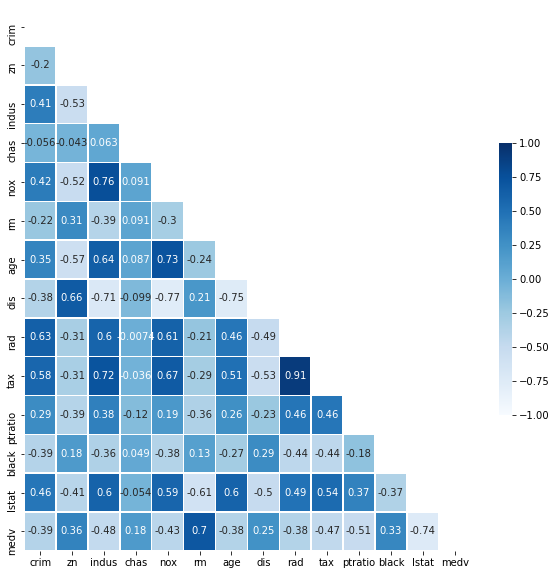

In [5]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

종속변수 medv와 상관계수가 -0.74로 가장 관련성이 높다고 판단되는 변수인 lstat를 독립변수로 사용하여 단순선형회귀모델을 만들어 보겠습니다.

#### 1.1.3 OLS(최소제곱법)

In [6]:
X = data["lstat"].to_numpy().reshape(-1,1)
X = sm.add_constant(X) # 선형모델에 상수항을 추가함
Y = data["medv"].to_numpy().reshape(-1,1)

단순선형회귀모델이 모수 $b_0$와 $b_1$을 추정하는 방법으로 OLS(Ordinary Least Squares)라고 불리우는 보통최소제곱법을 사용하겠습니다. 보통최소제곱법이란 오차의 제곱합이 최소가 되는 모수를 구하는 방법으로 식은 아래와 같습니다. $$\sum^n_{i=1}(y_i - \hat{y_i})^2$$ 
여기서 오차란 실측값과 예측값간의 차이를 의미합니다.

In [7]:
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           5.08e-88
Time:                        09:21:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

#### 1.1.4 추정된 모수와 결정계수

statsmodel 패키지에 있는 보통최소제곱법을 사용하여 위와 같은 결과가 나왔습니다. 위의 결과에서 집중해야하는 단어는 R-squared, const, x1입니다. 

In [8]:
print("b0의 계수 : {}\nb1의 계수 : {}".format(model.params[0],model.params[1]))
print("R-squared : {}".format(model.rsquared))

b0의 계수 : 34.55384087938312
b1의 계수 : -0.9500493537579906
R-squared : 0.5441462975864797


OLS에서 추정한 회귀 모델을 식으로 표현하면 $$\hat{y}_i = 34.533 - 0.95x_i$$ $b_0$와 $b_1$에 맞는 회귀모델을 산점도에 그린 결과 아래와 같습니다.

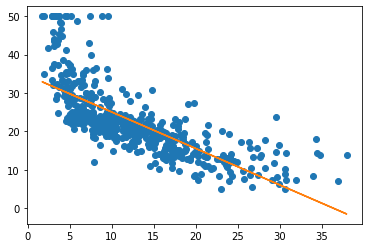

In [9]:
plt.plot(X[:,1],Y,'o')
plt.plot(X[:,1],model.predict(X))
plt.show()

R-squared은 결정계수라고 불리우며 모델을 평가하는 척도로써 활용됩니다. 결정계수란 전체 제곱합 중에서 회귀 제곱합이 설명하는 비중으로 모형의 설명력을 의미하며 식은 아래와 같습니다. $$R^2 = 1 - {RSS \over TSS}$$OLS를 통하여 나온 결정계수는 0.54가 나왔으며 이 의미는 데이터의 약 54%를 위에서 구한 회귀모델로 설명이 가능하다는 의미입니다. 여기서 주의할점은 입력변수가 증가할 수록 결정계수가 증가하기 때문에 이때는 수정된 결정계수인 Adj. R-squared를 보고 판단해야 합니다.

#### 1.1.5 신뢰구간

위에서 OLS를 통하여 모수들을 추정하였습니다. 추정된 모수로 95% 신뢰구간을 표현하면 아래와 같습니다.

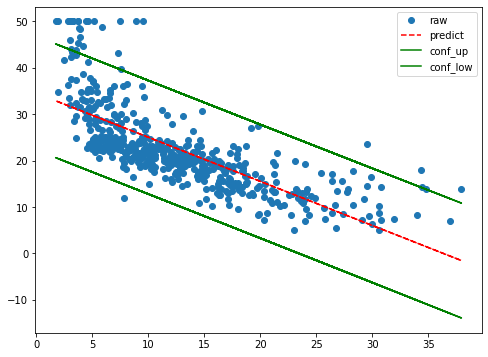

In [10]:
prst, conf_up, conf_low = wls_prediction_std(model)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X[:,1],Y,"o",label="raw")
ax.plot(X[:,1],model.predict(X),"r--",label="predict")
ax.plot(X[:,1],conf_up,"g-",label="conf_up")
ax.plot(X[:,1],conf_low,"g-",label="conf_low")
ax.legend()

여기서 95% 신뢰구간이란 말은 모수, 즉 실측값이 구간안에 포함되어있을 확률이 95%라는 의미로 모델을 100개의 신뢰구간속에 95번은 실측값이 포함되어져 있을거라는 의미 입니다. 그림을 예시로 들자면 총 100개의 선이 있을 때 파랑색 선은 실측값이 포함되어진 신뢰구간은 95개이며 빨간색 선은 실측값이 포함되어지지 않은 신뢰구간은 5개 이므로 95%의 신뢰구간을 만족한다고 할 수 있습니다. 
<img src = "https://imgur.com/PfJpT72.jpg" width = 600 height = 500>

지금까지 OLS를 통하여 단순회귀모델의 모수들을 추정하였습니다. 추정된 모수를 가지고 회귀선과 회귀선의 신뢰구간을 구하였습니다. 마지막으로 완성되어진 모델의 신뢰성 및 타당성을 검증하는 척도인 MSE를 알아보겠습니다. 

#### 1.1.6 MSE(평균제곱오차)

MSE는 Mean Square Error라고 불리며 평균제곱오차라고도 알려져 있습니다. 모델 평가의 척도로 사용되는 지표로 수치가 작을수록 좋은 모델이라는 의미 입니다. 공식은 아래와 같습니다. $$MSE = \sum^n_{i=1}({(y_i - \hat{y_i})^2  \over n}$$ 

$y_i$는 실측치, $\hat{y}$는 모델의 예측값, n은 실측치의 개수를 의미합니다. 계산되어진 MSE를 다른 모델들의 MSE와 비교하여 어떤 모델이 더 적합이 잘되었는지 판단하는 기준이 됩니다. 

In [11]:
# numpy를 활용한 평균제곱오차의 계산
y_pred = model.predict(X).reshape(-1,1)
print(f"numpy의 Mean Square Error(평균 제곱 오차) : {np.mean((Y-y_pred)**2)}")

numpy의 Mean Square Error(평균 제곱 오차) : 38.48296722989415


In [12]:
# 패키지를 사용한 평균제곱오차의 계산
MSE = mean_squared_error(y_true=Y,y_pred=model.predict(X).reshape(-1,1))
print(f"패키지의 Mean Square Error(평균 제곱 오차) : {MSE}")

패키지의 Mean Square Error(평균 제곱 오차) : 38.48296722989415


해당 척도를 이용하여 앞으로 나오는 모델들과의 성능을 비교해보겠습니다.

### 1.2 다항회귀모델

단순선형회귀모델에서 예측값과 신뢰구간을 구하였는데 막상 raw 데이터의 분포를 보니 직선의 형태로는 완전히 예측하기 힘들어 보입니다. 해당 데이터와 같이 약간의 곡선이 들어간 데이터를 좀 더 정확도 높게 예측하려면 모델의 예측값도 곡선을 그려야 합니다. 곡선 형태의 데이터를 예측하는 모델인 다항회귀모델을 만들어 보겠습니다.

sm.OLS.from_formula 함수를 사용하여 pandas 데이터 프레임 형태로부터 회귀모델을 만들 수 있습니다. 마찬가지로 해당 패키지를 사용하여 다항 회귀모델을 만들면 아래와 같습니다.

In [108]:
pol_X = data["lstat"]
pol_Y = data["medv"]
poly_df = pd.concat([pol_X,pol_Y], axis=1)
poly_model = sm.OLS.from_formula("medv ~ lstat + I(lstat**2)", data=poly_df).fit()
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 17 Dec 2020   Prob (F-statistic):          1.56e-112
Time:                        10:43:41   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

다항회귀모델을 식으로 표현하면 $$\hat{y}_i = 42.862 - 2.3328x_i + 0.0435x^2_i$$ 해당 다항회귀모델의 예측값을 산점도 위에 표현을 하면 아래와 같습니다.

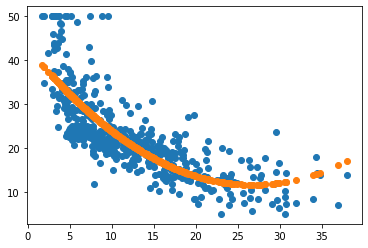

In [119]:
plt.plot(pol_X, pol_Y, 'o')
plt.plot(pol_X, poly_model.predict(pol_X), 'o')
plt.show()

예측값의 신뢰구간을 그리게 되면 아래와 같이 나오는데 이전 단순선형회귀모델보다 더 많은 실측값이 신뢰구간안에 포함되어져서 기존 단순선형회귀모델보다 더 잘 적합된 모델이라는 것을 알 수가 있었습니다.

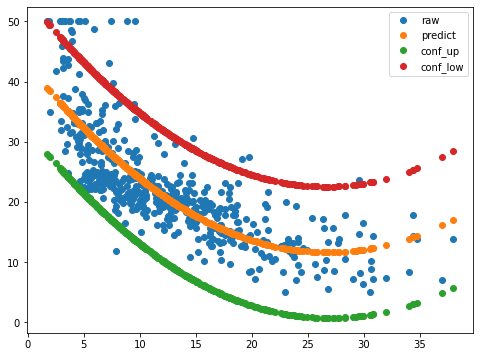

In [127]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prst, conf_up, conf_low = wls_prediction_std(poly_model)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(pol_X,pol_Y,"o",label="raw")
ax.plot(pol_X,poly_model.predict(pol_X),'o',label="predict")
ax.plot(pol_X,conf_up,'o',label="conf_up")
ax.plot(pol_X,conf_low,'o',label="conf_low")
ax.legend()

모델의 평가척도가 되는 MSE와 비교하여도 기존에는 MSE가 38이었지만 현재 다항회귀모델의 MSE는 30으로 수치가 더 낮기에 다항회귀모델이 현재 데이터에 더 잘 적합되어있다고 판단할 수 있습니다.

In [147]:
# 패키지를 사용한 평균제곱오차의 계산
# 단순선형회귀모델에 비하여 MSE가 크게 감소하였습니다.
MSE = mean_squared_error(y_true=pol_Y,y_pred=poly_model.predict(pol_X))
print(f"다항선형회귀모델의 Mean Square Error(평균 제곱 오차) : {MSE}")

다항선형회귀모델의 Mean Square Error(평균 제곱 오차) : 30.33052007585372


지금까지 모델들은 훈련데이터에서의 MSE를 구하여서 비교하였습니다. 하지만 저희들이 원하는 것은 훈련데이터를 사용되지 않은 검정데이터에서의 MSE가 가장 낮은 모델을 찾는 것입니다. 그러므로 모델 구축에 사용될 훈련데이터와 모델 검증에 사용될 검증데이터를 나누어서 두 데이터에 대한 모델의 MSE를 비교하고 어떤 형태의 모델에서 검정 MSE의 수치가 가장 작은지 알아보겠습니다.

훈련에 사용되지 않는 검증용 데이터를 만들기 위해서 sklearn 패키지의 train_test_split 함수를 이용하여 8:2의 비율로 나누겠습니다.

In [143]:
from sklearn.model_selection import train_test_split
X = data["lstat"].to_numpy().reshape(-1,1)
Y = data["medv"].to_numpy().reshape(-1,1)
X_train, X_val, Y_train, Y_val =train_test_split(X, Y, test_size=0.2, random_state=13)

훈련데이터로 구축된 다항회귀모델을 유연성을 조절하여 훈련 MSE와 검정 MSE를 구하겠습니다.

In [146]:
def poly_regression(X_train, Y_train, X_val, Y_val,degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    pol_reg = LinearRegression()
    pol_reg.fit(X_train_poly,Y_train)
    X_val_poly = poly.transform(X_val)
    
    tr_pred = pol_reg.predict(X_train_poly)
    val_pred = pol_reg.predict(X_val_poly)
    
    tr_mse = mean_squared_error(Y_train, tr_pred)
    val_mse = mean_squared_error(Y_val, val_pred)
    
    
    return tr_mse, val_mse

훈련 MSE와 검정 MSE를 유연성에 따라서 비교해본 결과 유연한 모델일 수록 훈련MSE는 급격히가 줄어든 뒤 유연성 3 이후부터는 특별한 변화없이 일정한 수준의 MSE를 보여주고 있습니다. 하지만 검정 MSE의 경우 일정한 수준의 MSE를 유지하다고 유연성 9 이후부터 급격하게 증가하는 부분이 발생합니다. 이와 같이 검정 MSE의 값이 급격히 증가하기 이전의 유연성을 선택하는 것이 좋습니다.

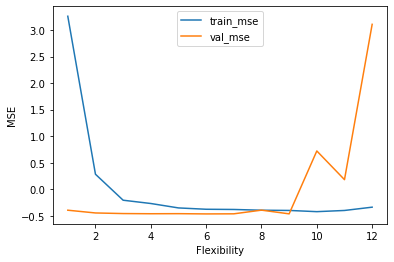

In [148]:
bucket_mse = []
for i in range(12):
    mse = poly_regression(X_train, Y_train, X_val, Y_val, i)
    bucket_mse.append(mse)
bucket_mse = np.array(bucket_mse)
bucket_mse = (bucket_mse - np.mean(bucket_mse, axis=0)) / np.std(bucket_mse, axis=0)
x_axis = np.arange(len(bucket_mse)) + 1
plt.plot(x_axis, bucket_mse[:,0], label = "train_mse")
plt.plot(x_axis, bucket_mse[:,1], label = "val_mse")
plt.legend()
plt.xlabel("Flexibility")
plt.ylabel("MSE")
plt.show()

급격히 MSE가 증가하는 부분에서 과적합이 발생하였다고 하며 이는 모델이 훈련 데이터에 너무 적합이 되어 검정 데이터에 대해서는 예측력이 떨어지는 현상을 말합니다. 

### 1.3 다중선형회귀모델

지금까지는 1개의 입력변수로 출력변수를 예측하는 모델을 다루었습니다. 하지만 현실적인 데이터들에서는 입력변수들이 2개 이상으로 존재하는 경우가 많습니다. 이러한 데이터의 상황에 맞추어 2개 이상의 입력변수를 가지고 출력변수를 예측하는 다중회귀모델에 대하여 배우겠습니다.


다중선형회귀모델을 사용하게 될 경우 분석할 입력변수의 개수가 증가하면서 기존 단순선형모델에서 없던 새로운 문제가 발생합니다. 그건 다중공선성 문제라고 하며 다중공선성 문제는 입력변수간의 관련성이 높아서 출력변수에 영향을 끼치는 문제입니다. 다중공선성 문제가 발생하면 출력변수에 영향을 끼친 원인을 명확히 구분하기 애매해집니다. 그래서 보통은 변수선택법과 변수변환을 통하여 다중공선성 문제를 해결하는데 기존 다중선형회귀모델에서도 상호작용 항을 이용하여 원인을 구분할 수 있습니다.

다중회귀모델은 이전에 다항회귀모델에서 사용한 형태와 비슷하며 전체 데이터가 있는 데이터프레임에서 입력변수와 출력변수를 나누고 "출력변수 ~ 입력변수" 형태를 취하기만 하면 쉽게 다중회귀모델을 만들고 분석도 가능합니다. 상호작용 항이 있는 다중회귀분석을 하면 아래와 같습니다.

In [143]:
# 상호작용 항
import statsmodels.formula.api as smf
multi_inter_model = smf.ols(formula = "medv~lstat + crim + crim*lstat ",data=data).fit()
print(multi_inter_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           4.94e-88
Time:                        12:30:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0292      0.616     56.905      0.0

medv를 출력변수로 하고 lstat, crim, lstat과 crim의 상호작용 항을 입력변수로 하는 다중선형회귀모델을 만든결과 위와 같이 나왔으며 이를 식으로 표현하면 $$\hat{y}_i = 35.0292 - 0.9684x_{1i} - 0.3622x_{2i} + 0.0145x_{3i}$$ MSE는 기존에 단순선형회귀모델보다는 잘 적합되어 있다고 할 수 있지만 다항회귀모델에 비하면 부족하다고 판단할 수 있습니다.

In [146]:
MSE = mean_squared_error(data["medv"], multi_inter_model.predict(data[["lstat","crim"]]))
print(f"다중선형회귀모델의 Mean Square Error(평균 제곱 오차) : {MSE}")

다중선형회귀모델의 Mean Square Error(평균 제곱 오차) : 37.50782149605498


### 1.4 질적 설명 변수

데이터는 흔히 숫자형인 양적 데이터와 숫자형 이외의 데이터인 질적 데이터로 나뉘며 지금까지는 숫자형 데이터를 입력변수로 삼아서 회귀모델을 만들었습니다. 지금부터는 문자형 데이터를 이용한 회귀모델을 만들어 보도록 하겠습니다.

데이터는 400개의 지점의 어린이용 카시트 매출관련 데이터입니다.

In [149]:
carseats = pd.read_csv("./data/Carseats.csv",index_col=[0])
print(f"데이터 개수 : {carseats.shape[0]}    변수의 개수 : {carseats.shape[1]}")
carseats

데이터 개수 : 400    변수의 개수 : 11


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


데이터의 정보를 살펴보면 Urban, US, ShelveLoc은 object 데이터 타입으로 질적 변수임을 알 수 가 있습니다.

In [ ]:
print(carseats.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB
None


In [186]:
carseats.groupby("ShelveLoc").count()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
ShelveLoc,,,,,,,,,,
Bad,96,96,96,96,96,96,96,96,96,96
Good,85,85,85,85,85,85,85,85,85,85
Medium,219,219,219,219,219,219,219,219,219,219


질적변수의 경우 모델이 들어가는 형태로 바꾸기 위하여 범주형 변수를 더미변수로 만드는 작업이 필요합니다. 지금 입력변수로 사용할 ShelveLoc의 경우에는 Bad, Good, Medium 3개의 범주로 나뉘어 있습니다. 이 범주형 변수를 더미변수로 만드면 아래와 같습니다.
<img src="https://imgur.com/lPgswW1.jpg">

더미변수로 변한 ShelveLoc을 선형회귀모델을 만들시 아래와 같습니다.

In [157]:
category_model = smf.ols(formula = "Sales ~ C(ShelveLoc)",data=carseats).fit()
print(category_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           1.27e-33
Time:                        13:18:46   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

해당 선형회귀모델을 식으로 표현하면 $$\hat{y}_i = 5.5229 - 4.6911x_{1i} + 1.7837x_{2i}$$로 나오는데 이를 해석하면 입력변수로 "Bad"가 들어오면 출력값은 5.5229이고 "Good"이 들어오면 10.21이 나오며 "Medium"이 들어오면 7.21이 나온다는 의미입니다.

In [234]:
pred = category_model.predict(carseats["ShelveLoc"])
bad, medium, good = np.unique(pred)
pred[pred == bad] = "Bad"
pred[pred == medium] = "Medium"
pred[pred == good] = "Good"
print(f"각 범주별 Sales \nBad : {bad}\nMedium : {medium}\nGood : {good}")


각 범주별 Sales 
Bad : 5.52291666666667
Medium : 7.3065753424657585
Good : 10.214000000000006


### 1.5 선형회귀모델의 잠재적 문제들

지금까지 질적변수, 양적변수, 2개이상의 입력변수, 다항회귀등 다양한 형태의 회귀모델을 만들어 보았습니다. 해당 회귀모델들은 각 데이터의 특성에 맞게 적절한 형태의 모델을 선택하여 MSE를 활용하여 적합이 잘되어진 모델인지 판단해왔습니다. 하지만 모델이 잘 적합되어질려면 기본 조건들이 존재하기에 이 조건을 무시하는 경우에는 의미있는 모델을 만들기가 어렵습니다. 또한 데이터 자체의 특성 때문에 발생하는 문제들도 존재합니다.

#### 1.5.1 입력변수와 출력변수간의 비선형적 관계성

회귀모델을 사용하려면 기본 가정이 분석하려는 입력변수와 출력변수의 관계가 선형적이어야 합니다. 이를 확인하는 방법으로는 잔차그래프를 그려서 나온 데이터 추세에 패턴이 존재한다면 이는 비선형성이 강하다는 의미이고 패턴이 존재하지 않는다면 선형성을 보인다는 의미입니다.

변수 medv와 lstat의 관계가 선형적인지 확인해보겠습니다.

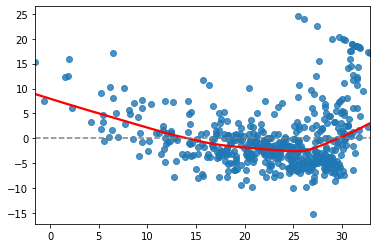

In [170]:
res = ols("medv~ lstat",data=data).fit()
fitted = res.predict(data["lstat"])
residual = data["medv"] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

잔차의 추세선을 확인한 결과 U자 형태의 패턴이 보이므로 medv와 lstat은 비선형성이 강하다는 의미입니다. 이와 같이 분석하고자 하는 설명변수와 반응변수의 관계가 비선형적인 경우 설명변수를 비선형적으로 변환하여 회귀모델에 적용합니다. lstat을 비선형적으로 변환 후 다시 잔차그래프를 확인하겠습니다.

여기서 비선형적으로 변환한다는 의미는 설명변수의 raw값에 제곱을 하거나 루트, 로그등의 변환을 취한 값을 사용한다는 의미입니다.

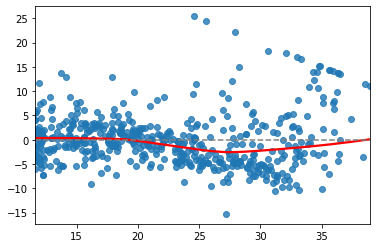

In [171]:
res = ols("medv~ lstat + I(lstat**2)",data=data).fit()
fitted = res.predict(data["lstat"])
residual = data["medv"] - fitted

sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

설명변수 lstat을 lstat의 제곱을 가진 이차항을 포함하는 모델에서 발생되는 잔차로 그래프를 그린 결과 잔차에 패턴이 거의 보이지 않으므로 이차항이 데이터에 대한 적합을 향상시킨다는 것을 의미합니다.

#### 1.5.2 잔차항의 자기상관성(오차의 독립성)

잔차는 잔차끼리 독립성을 지녀야 합니다. 만약이 잔차항끼리 상관성을 가지게 된다면 해당 데이터로 회귀모델을 만드는 것은 부적절합니다. 왜냐하면 잔차항끼리의 상관성이 발생하면 이웃하는 값끼리는 서로 성질이 비슷하게 됩니다. 이런 경우의 데이터는 주로 시계열 자료나 종단연구 자료들이 이러한 특성을 띄며 이런 경우에는 시계열 분석 모델 기법을 사용해야 합니다.

일반적으로는 자료수집과정에서 무작위 추출을 하였다면 잔차의 독립성은 만족한다고 보기에 실험계획이 필요합니다.

오차의 독립성 가설을 검정하기 위하여 Durbin Watson 가설검정을 사용해야 합니다

#### 1.5.3 오차항의 상수가 아닌 분산(오차의 등분산성)

오차항의 등분산성은 설명변수와 독립변수간의 선형관계를 보기위한 잔차그래프에서 확인이 가능합니다. 잔차그래프가 깔때기 모양으로 퍼져나가는 형태이거나 모여드는 추세를 보이는 경우에는 오차의 등분산성을 만족하지 못하기에 설명변수나 반응변수에 변환을 가해야 합니다.

<img src="https://imgur.com/2f046a0.jpg">

왼쪽그림의 경우 등분산성을 만족하지 못하는 잔차그래피이고 오른쪽 그림의 경우 등분산성을 만족하고 선형관계를 가진다고 생각하는 형태의 잔차그래프 입니다.

#### 1.5.4 오차항의 정규성

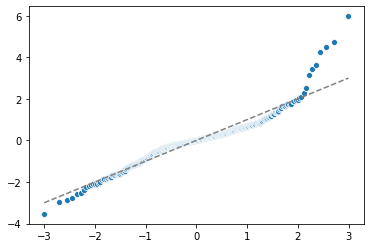

In [185]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3, 3], [-3, 3], "--", color="grey")

#### 1.5.4 이상치

스튜던트화 잔차로 그림 

#### 1.5.5 영향력이 높은 실측값

#### 1.5.6 다중공선성

VIF